In [7]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore") # отключаем предупреждения 

In [8]:
data = pd.read_csv('credit.csv', encoding='cp1251', delimiter=';')

In [9]:
data.head().T

,0,1,2,3,4
client_id,1,2,3,4,5
gender,M,F,M,F,M
age,NaN,NaN,32.0,27.0,45.0
marital_status,NaN,MAR,MAR,NaN,NaN
job_position,UMN,UMN,SPC,SPC,SPC
credit_sum,"59998,00","10889,00","10728,00","12009,09",NaN
credit_month,10,6,12,12,10
tariff_id,1.6,1.1,1.1,1.1,1.1
score_shk,NaN,NaN,NaN,NaN,"0,421385"
education,GRD,NaN,NaN,NaN,SCH


# Очистка 

In [10]:
# посмотрим столбец marital_status и узнаем какое значение в нем является самым частым 
data.marital_status.describe()

count     170743
unique         5
top          MAR
freq       93954
Name: marital_status, dtype: object

In [11]:
# посмотрим столбец education и узнаем какое значение в нем является самым частым 
data.education.describe()

count     170741
unique         5
top          SCH
freq       87537
Name: education, dtype: object

In [12]:
# посмотрим столбец living_region и узнаем какое значение в нем является самым частым 
data.living_region.describe() 

count             170554
unique               301
top       ОБЛ МОСКОВСКАЯ
freq               12228
Name: living_region, dtype: object

In [13]:
# заполним нечисловые столбцы с пропусками самыми часто встречающимися значениями
data.marital_status.fillna('MAR', inplace=True)
data.education.fillna('SCH', inplace=True)
data.living_region.fillna("ОБЛ МОСКОВСКАЯ", inplace = True)

In [14]:
# заполним числовые столбцы с пропусками медианными значениями
data.age.fillna(data.age.median(), inplace=True)
data.credit_count.fillna(data.credit_count.median(), inplace=True)
data.overdue_credit_count.fillna(data.overdue_credit_count.median(), inplace=True)

In [15]:
#  в столбцах 'credit_sum', 'score_shk' поменяем запятые на точки и преобразуем их в числовой  формат
for i in ['credit_sum', 'score_shk']:
    data[i] = data[i].str.replace(',', '.').astype('float')

In [16]:
# теперь числовыми столбцы 'credit_sum', 'score_shk' заполним медианными значениями
data.score_shk.fillna(data.score_shk.median(), inplace=True)
data.monthly_income.fillna(data.monthly_income.median(), inplace=True)
data.credit_sum.fillna(data.credit_sum.median(), inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  object 
 2   age                   170746 non-null  float64
 3   marital_status        170746 non-null  object 
 4   job_position          170746 non-null  object 
 5   credit_sum            170746 non-null  float64
 6   credit_month          170746 non-null  int64  
 7   tariff_id             170746 non-null  float64
 8   score_shk             170746 non-null  float64
 9   education             170746 non-null  object 
 10  living_region         170746 non-null  object 
 11  monthly_income        170746 non-null  float64
 12  credit_count          170746 non-null  float64
 13  overdue_credit_count  170746 non-null  float64
 14  open_account_flg      170746 non-null  int64  
dtype

# Разделим наши данные на train и test 

In [18]:
from numpy.random import RandomState


rng = RandomState()

train = data.sample(frac=0.7, random_state=rng)
test = data.loc[~data.index.isin(train.index)]

[to_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [19]:
train.to_csv('train.csv', index=False)

In [20]:
test.to_csv('test.csv', index=False)

0    98590
1    20932
Name: open_account_flg, dtype: int64


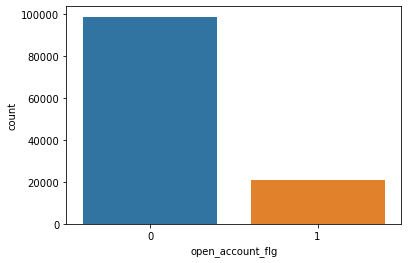

In [21]:
# В датафрейме присутствует явный дисбаланс классов, 
# поэтому при построении моделей и оценке качества это необходимо учитывать.
print(train['open_account_flg'].value_counts())
sns.countplot(train['open_account_flg']);

# Случайный Лес 
## Нахождение информативных признаков 

In [2]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

In [3]:
# Чтобы решить проблему дисбаланса классов, можно использовать Over или UnderSampling
# Используем UnderSampling 
rus = RandomUnderSampler(random_state = 0)

In [4]:
# Применим к датафрейму StandartScaler(), 
# после чего решим проблему дисбаланса классов путем применения RandomUnderSampler.
stsc = StandardScaler()

In [23]:
# Отделим целевую переменную от всех остальных признаков
x = train.drop('open_account_flg', axis = 1)
x = pd.get_dummies(x)
y = train['open_account_flg']

In [24]:
# Отмасштабируем данные
stsc_df = pd.DataFrame(stsc.fit_transform(x), columns = x.columns)
# Решим проблему дисбаланса
X_resampled, y_resampled = rus.fit_sample(stsc_df, y)

In [25]:
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.3, random_state=42)

In [26]:
# создадим деревья решений
clf_rf = RandomForestClassifier()

In [27]:
parametrs = {"n_estimators": list(range(5, 20, 5)), 
             "max_depth": list(range(1, 12, 2)),
             "min_samples_leaf": list(range(1, 7)),
             "min_samples_split": list(range(2, 9, 2))}

In [28]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5, n_jobs=-1)
grid_search_cv_clf

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [5, 10, 15]})

cv=5 говорит о том, что в каждый проверочный семпл при кросс-валидации попадет 100/5=20% данных. На 80% учимся, на 20% проверяем.

Изменение cv конечно изменит итоговый результат, и подбирать значение нужно исходя из к-ва доступных данных. cv=5 это такое довольно универсальное значение.

In [29]:
# обучим на разных параметрах 
grid_search_cv_clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [5, 10, 15]})

In [30]:
# Получаем лучшие параметры от лучшей обученной модели.
grid_search_cv_clf.best_params_

{'max_depth': 11,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 5}

In [31]:
# занесем лучшие параметры 
best_clf = grid_search_cv_clf.best_estimator_

In [32]:
# посмотрим на нащ результат 
best_clf.score(x_test, y_test)

0.8219315614803246

In [33]:
# важные параметры 
feature_importances = best_clf.feature_importances_

In [34]:
# сделаем df важных параметров
feature_importances_df = pd.DataFrame({"features": list(x_train), "feature_importances": feature_importances})

In [35]:
# 10 важных параметров 
feature_importances_df.sort_values("feature_importances", ascending=False).head(10)

,features,feature_importances
4,tariff_id,0.140251
2,credit_sum,0.119238
1,age,0.117516
3,credit_month,0.084178
5,score_shk,0.064150
36,education_SCH,0.060252
24,job_position_PNA,0.057125
34,education_GRD,0.048346
7,credit_count,0.027094
13,marital_status_MAR,0.025283


In [36]:
df = feature_importances_df.head(10)

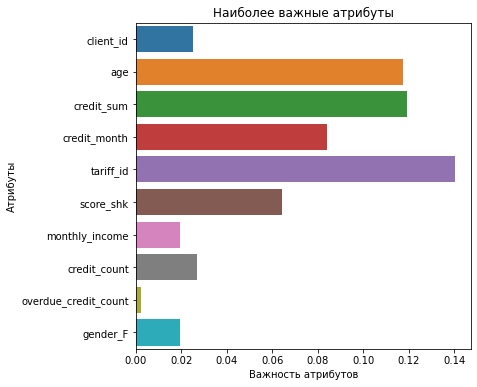

In [37]:
# изобразим 10 важных параметров 
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y=df.features, x=df.feature_importances)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

Теперь у нас есть классификатор, определяющий кому можем дать кредит, а кому нет. 

In [38]:
predictions = grid_search_cv_clf.predict(x_test)

In [39]:
print(np.sum(predictions == 1))

31


# Логистическая регрессия 

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
x = train.drop('open_account_flg', axis = 1)
x = pd.get_dummies(x)
y = train['open_account_flg']

In [24]:
# Отмасштабируем данные
stsc_df = pd.DataFrame(stsc.fit_transform(x), columns = x.columns)
# Решим проблему дисбаланса
X_resampled, y_resampled = rus.fit_sample(stsc_df, y)

In [25]:
x_train, x_test, y_train, y_test =  train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [26]:
clf_lr = LogisticRegression()
lr_param = {
    'C': np.logspace(0, 4, 10),
    'penalty': ['l1', 'l2']
}

In [27]:
lr_search_cv = GridSearchCV(clf_lr, param_grid=lr_param, cv=5, n_jobs=-1)

In [28]:
lr_search_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [29]:
lr_search_cv.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [30]:
best_lr_clf = lr_search_cv.best_estimator_ 

In [31]:
best_lr_clf.score(x_test, y_test)

0.6105891719745223

In [32]:
predictions = lr_search_cv.predict(x_test)

In [33]:
print(np.sum(predictions == 1))

6281


# Метрики

In [34]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

## Деревья решений 

In [50]:
# Сформируем предсказания
tree_predictions = best_clf.predict(x_test)
# Измерим accuracy на train и test
tree_acc_train = best_clf.score(x_train, y_train) 
tree_acc_test = best_clf.score(x_test, y_test) 
# Сформируем вероятность прогнозов
y_scores = best_clf.predict_proba(x_test)
y_scores = y_scores[:,1]
    
# Выведем accuracy, precision, recall
print(f"Decision tree accuracy on train: {tree_acc_train:.3f}")
print(f"Decision tree accuracy on test: {tree_acc_test:.3f}")
    
print(f"Precision on Decision tree: {precision_score(y_test, tree_predictions):.3f}")
print(f"Recall on  Decision tree: {recall_score(y_test, tree_predictions):.3f}")

Decision tree accuracy on train: 0.825
Decision tree accuracy on test: 0.822
Precision on Decision tree: 0.710
Recall on  Decision tree: 0.003


## Логистическая Регресссия 

In [35]:
predictions = best_lr_clf.predict(x_test)
lr_acc_train = best_lr_clf.score(x_train, y_train) 
lr_acc_test = best_lr_clf.score(x_test, y_test) 
# Сформируем вероятность прогнозов
y_scores = best_lr_clf.predict_proba(x_test)
y_scores = y_scores[:,1]
    
# Выведем accuracy, precision, recall
print(f"Logistic Regression accuracy on train: {lr_acc_train :.3f}")
print(f"Logistic Regression accuracy on test: {lr_acc_test:.3f}")
    
print(f"Precision on Logistic Regression: {precision_score(y_test, predictions):.3f}")
print(f"Recall on  Logistic Regression: {recall_score(y_test, predictions):.3f}")

Logistic Regression accuracy on train: 0.623
Logistic Regression accuracy on test: 0.611
Precision on Logistic Regression: 0.611
Recall on  Logistic Regression: 0.611


# Вывод

Можно заметить, что дерево решений по сравнению с логистической регрессией дает немного большее качество полноты (0.710 vs 0.611 ).